# Time-mean Sea Surface Height (SSH)

This notebook is converted from plt_ssh.py, which (a) calculates the zonal- and time-mean SSH differences across the ACC and plots the time-mean SSH.

In [16]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import scipy.io

In [17]:
data = nc.Dataset('/short/v45/lxy581/mom6/archive/so_mom6_v33/output028/prog.nc','r')

In [18]:
xh = data.variables['xh'][:]
yh = data.variables['yh'][:]

SSHm is the time-mean SSH.

In [19]:
SSH  = data.variables['SSH'][:,:,:]
SSHm = np.nanmean(SSH,axis=0)

Calculate the zonally-averaged SSH differences across the ACC. 

SSHm[-1,:] represents the northern-most row and SSHm[0,:] represents the southern-most row.

In [20]:
SSHd = SSHm[-1,:]-SSHm[0,:]
print np.mean(SSHd)

1.78752


The following line avoids the $DISPLAY variable error.

In [21]:
%matplotlib inline

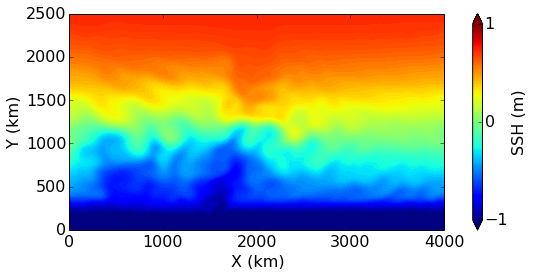

In [22]:
plt.figure(1,figsize=(8,5))

h_level = np.arange(-1,1+0.02,0.02)
h_ticks = np.arange(-1,1+1,1)

X,Y=np.meshgrid(xh,yh)

pc = plt.contourf(X,Y,SSHm,cmap=plt.cm.jet,levels=h_level,extend='both')
cb = plt.colorbar(pc,ticks=h_ticks)
plt.gca().set_yticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_yticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_xticks(np.arange(-2000,2000 + 1000,1000))
plt.gca().set_xticklabels(['0','1000','2000','3000','4000'])
plt.gca().set_position([0.15,0.2,0.65,0.6])
cb.ax.set_position([0.85,0.2,0.03,0.6])
cb.set_label('SSH (m)',y=0.5,fontsize=16)
cb.ax.tick_params(labelsize=16)
plt.xlabel('X (km)',fontsize=16)
plt.ylabel('Y (km)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()